In [1]:
#Importing needed packages PANDAS/ NUMPY/ MATPLOTLIB/ SEABORN
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
# Reading the dataset

base_data = pd.read_csv('Data.csv')

In [3]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# **Understanding the Data :**

In [4]:
base_data.shape

(110527, 14)

In [5]:

base_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



* The 'Age' column has a minimum value of -1, which seems like an error or an outlier. It wil need further investigation and cleaning.
* Age Distribution: The 'Age' column has a mean of approximately 37 years, with patients ranging from infants to 115 years old. The majority of patients fall between 18 and 55 years, as indicated by the 25th, 50th, and 75th percentiles.
* The 'Scholarship' column indicates whether a patient receives financial aid. The mean suggests that around 10% of patients have a scholarship.
* 'Hipertension', 'Diabetes', 'Alcoholism', and 'Handcap' columns are binary (0 or 1), indicating the absence (0) or presence (1) of the respective health condition or handicap.
* 'SMS_received' indicates whether the patient received an SMS reminder.
* The count of 'AppointmentID' suggests there are 110,527 appointments in the dataset.




In [6]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* ScheduledDay and AppointmentDay are of type object, which suggests they need to be converted to datetime for time-related analysis.
* There are no null values in any of the columns (non-null count is the same as the total number of entries).

# **Data Cleaning**

In [7]:

#ScheduledDay and AppointmentDay need to be converted to datetime format.
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')



In [8]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
# 0 is Monday, 6 is Sunday

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.day_name()
base_data['app_weekday'] = base_data['AppointmentDay'].dt.day_name()

In [10]:
base_data.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [11]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'Showed'})

In [26]:
base_data['Showed'] = base_data['Showed'].apply(lambda x: 1 if x=='No' else 0 )

Text(0.5, 1.02, 'Count of TARGET Variable per category')

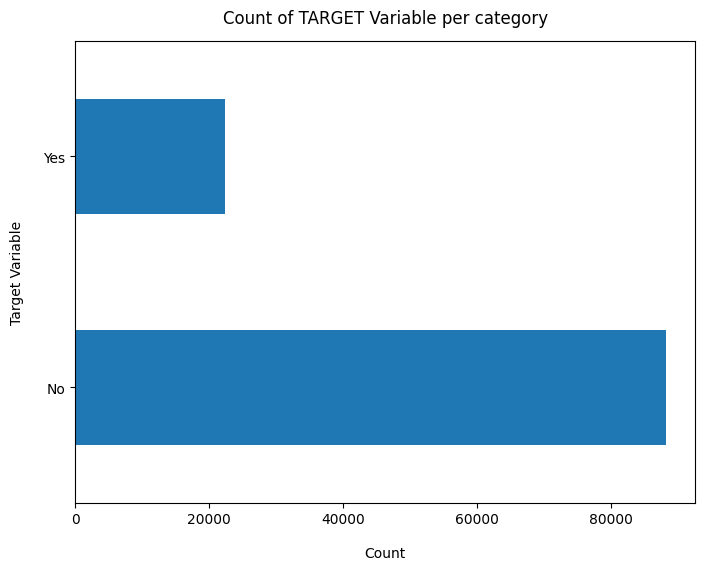

In [12]:
base_data['Showed'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [13]:
# calculating the % of appointments or not
100*base_data['Showed'].value_counts()/len(base_data['Showed'])

No     79.806744
Yes    20.193256
Name: Showed, dtype: float64

This indicates an imbalanced dataset, as there is a significant difference in the distribution of the two classes ('No' and 'Yes') and need to be addressed when modelling

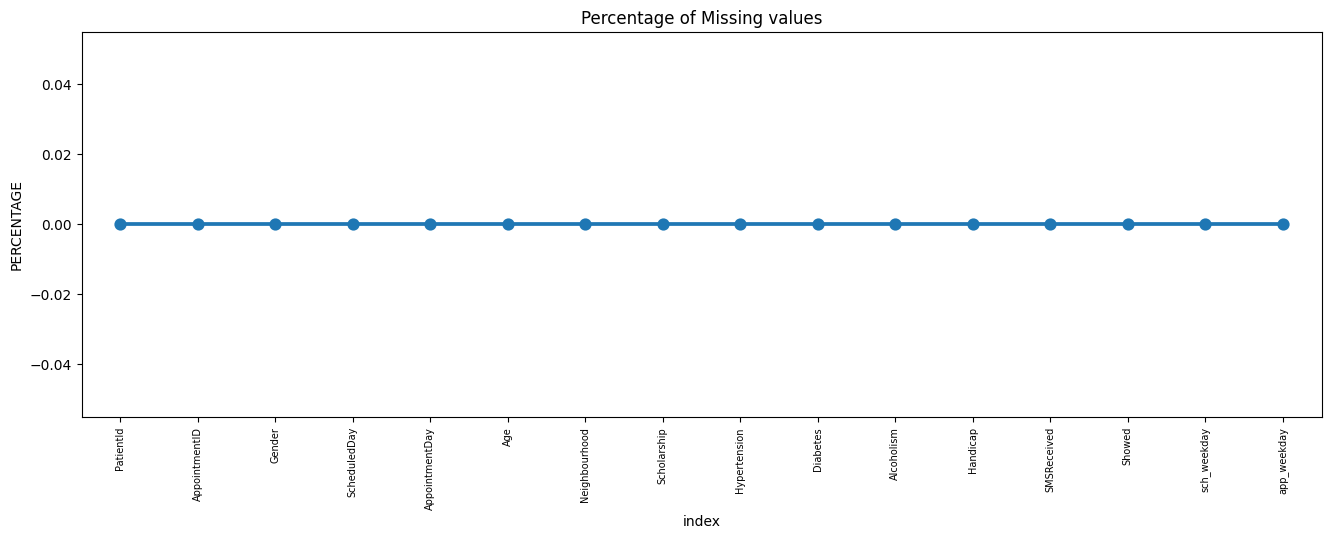

In [14]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0, data= missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


#From the graph bellow we can that there are no missing values.

In [15]:
base_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
Showed            0
sch_weekday       0
app_weekday       0
dtype: int64

The are no missing values in this dataset.

In [16]:
#Check for negative values
base_data[base_data['Age']<  0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Showed,sch_weekday,app_weekday
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday


In [17]:
#Replace the negative value in the Age clumn with the mean of ages .
mean_age = base_data['Age'].mean()
base_data['Age'] = base_data['Age'].apply(lambda x: mean_age if x < 0 else x)


In [18]:
# Group the tenure in bins of 12 months
base_data['Age']
labels = ["{0} - {1}".format(i, i + 20) for i in range(0, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(0, 130, 20), right=False, labels=labels)


In [19]:
list(base_data)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'Showed',
 'sch_weekday',
 'app_weekday',
 'Age_group']

In [20]:
from plotnine import ggplot, aes, geom_bar,geom_histogram, geom_boxplot, facet_wrap, geom_hline, scale_color_manual, scale_x_discrete, ggtitle,labs, scale_fill_manual

# **ANALYSIS**

1. What is the age distribution of those that booked the appointment?





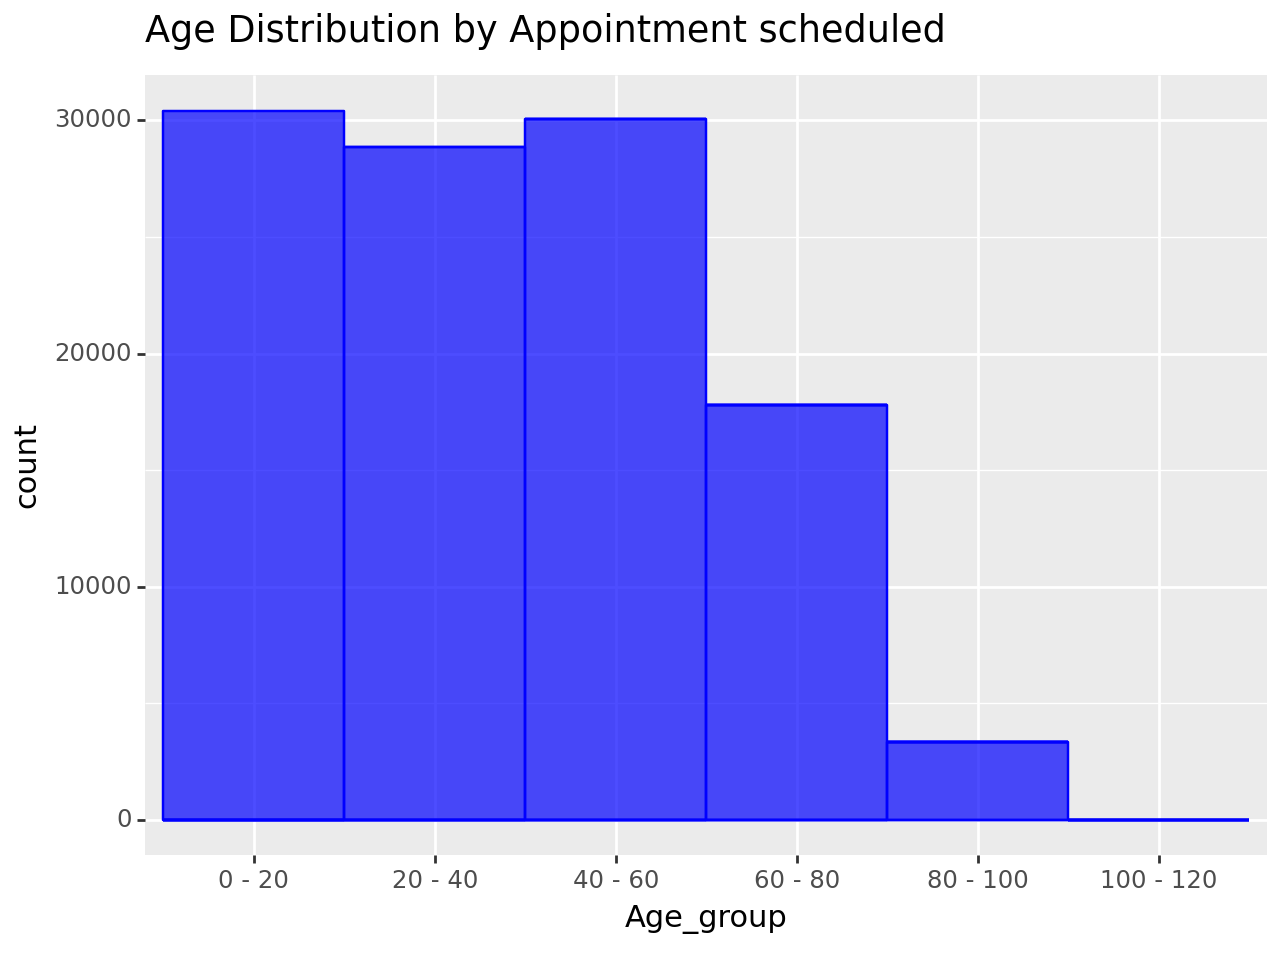

<Figure Size: (640 x 480)>

In [21]:
g_Age_1 =ggplot(base_data, aes(x='Age_group')) +geom_histogram(binwidth=1, color='blue', fill='blue', alpha=0.7)+ggtitle("Age Distribution by Appointment scheduled")
g_Age_1

Patients between the ages of 0 to 20 have the highest number of scheduled appointments and 80-120 being the lowest.

* What age group cancelled the least?





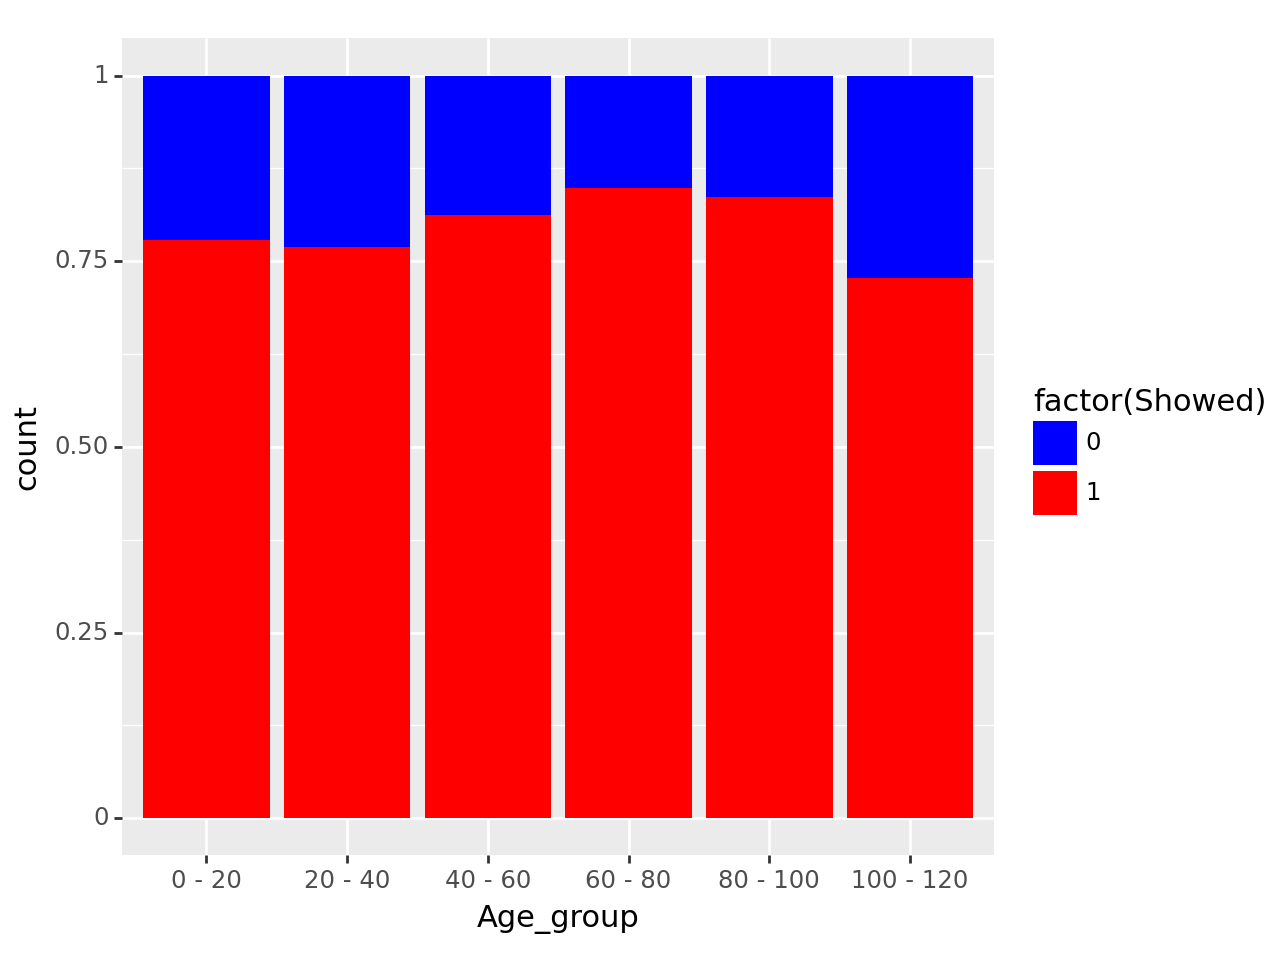

<Figure Size: (640 x 480)>

In [27]:
custom_colors = ["blue", "red"]
ggplot(base_data, aes(x='Age_group', fill='factor(Showed)')) + geom_bar(position="fill")+scale_fill_manual(values=custom_colors)


From this chart, Ages between 40 and 100 have the lowest cancellation of appointments counts.

2. What are the proportions and show rate by day of the week?

In [28]:
base_data.app_weekday.value_counts(normalize=True)

Wednesday    0.234033
Tuesday      0.231980
Monday       0.205515
Friday       0.172076
Thursday     0.156043
Saturday     0.000353
Name: app_weekday, dtype: float64

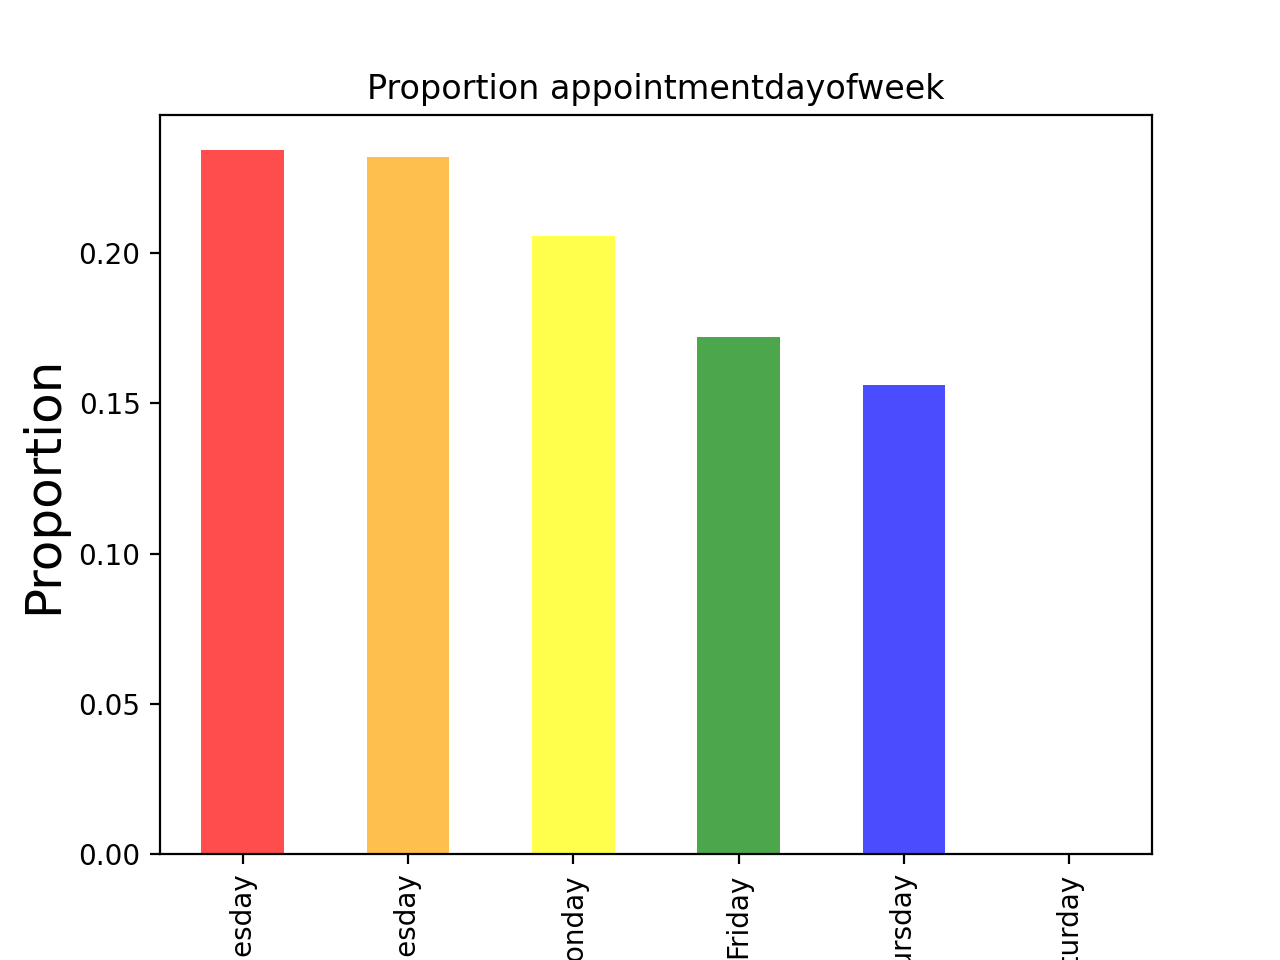

In [29]:
# show bar with appointmentdayofweek proportions
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
base_data.app_weekday.value_counts(normalize=True).plot(kind='bar', alpha=.7, color=colors);

# title and labels

plt.title('Proportion appointmentdayofweek');
plt.xlabel('appointmentdayofweek', fontsize=18)
plt.ylabel('Proportion', fontsize=18);

Patients prefered having appointments on Tuesday and Wednesday with the most appointmnent counts.

4. What day had the highest show up rate?

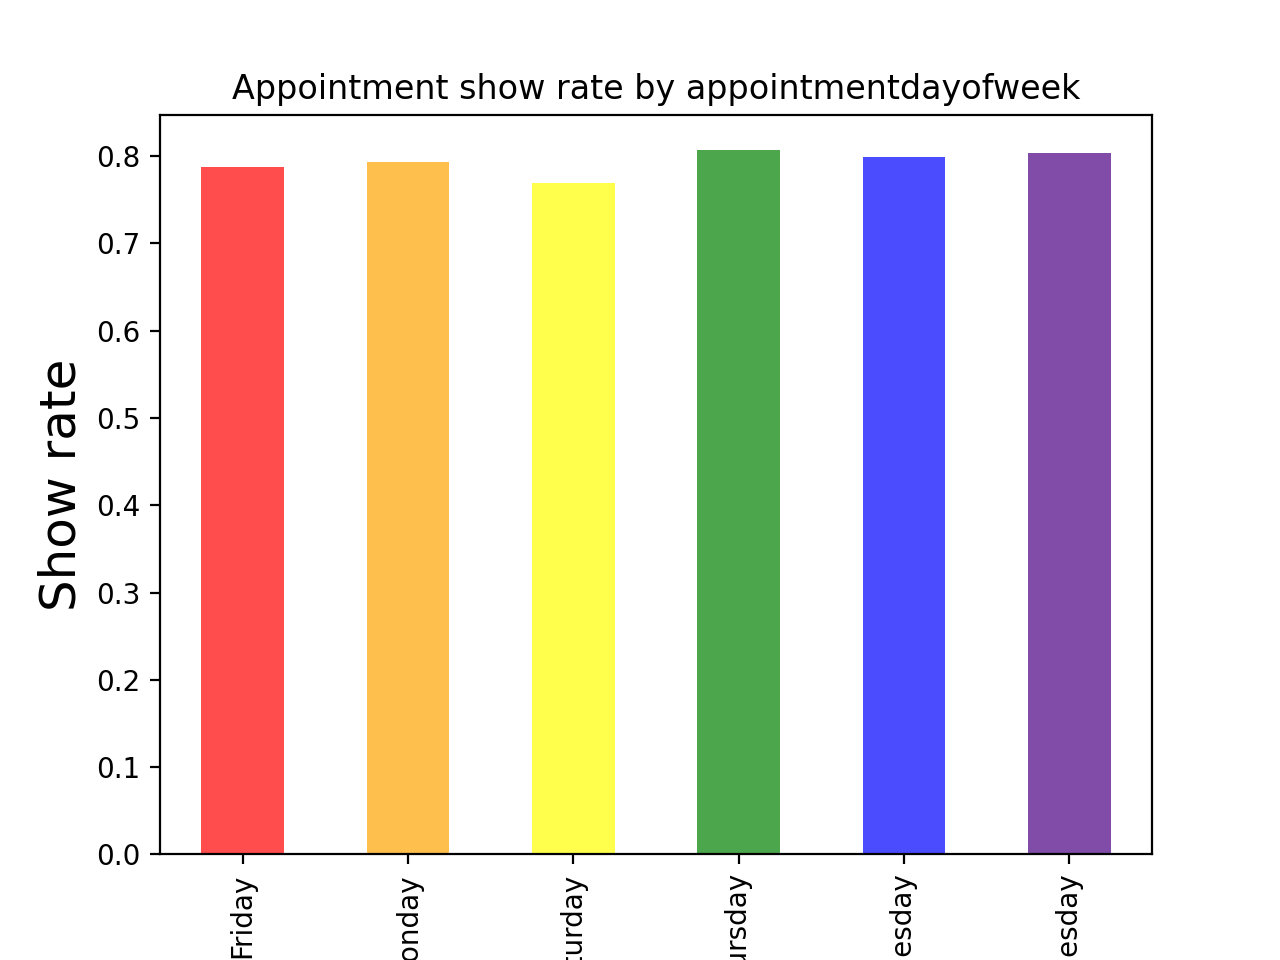

In [30]:
base_data.groupby('app_weekday')['Showed'].mean().plot(kind='bar', alpha=.7, color=colors)


# title and labels

plt.title('Appointment show rate by appointmentdayofweek');
plt.xlabel('appointmentdayofweek', fontsize=18)
plt.ylabel('Show rate', fontsize=18);


Thursday had he highest showed up rate and Saturday the lowest.


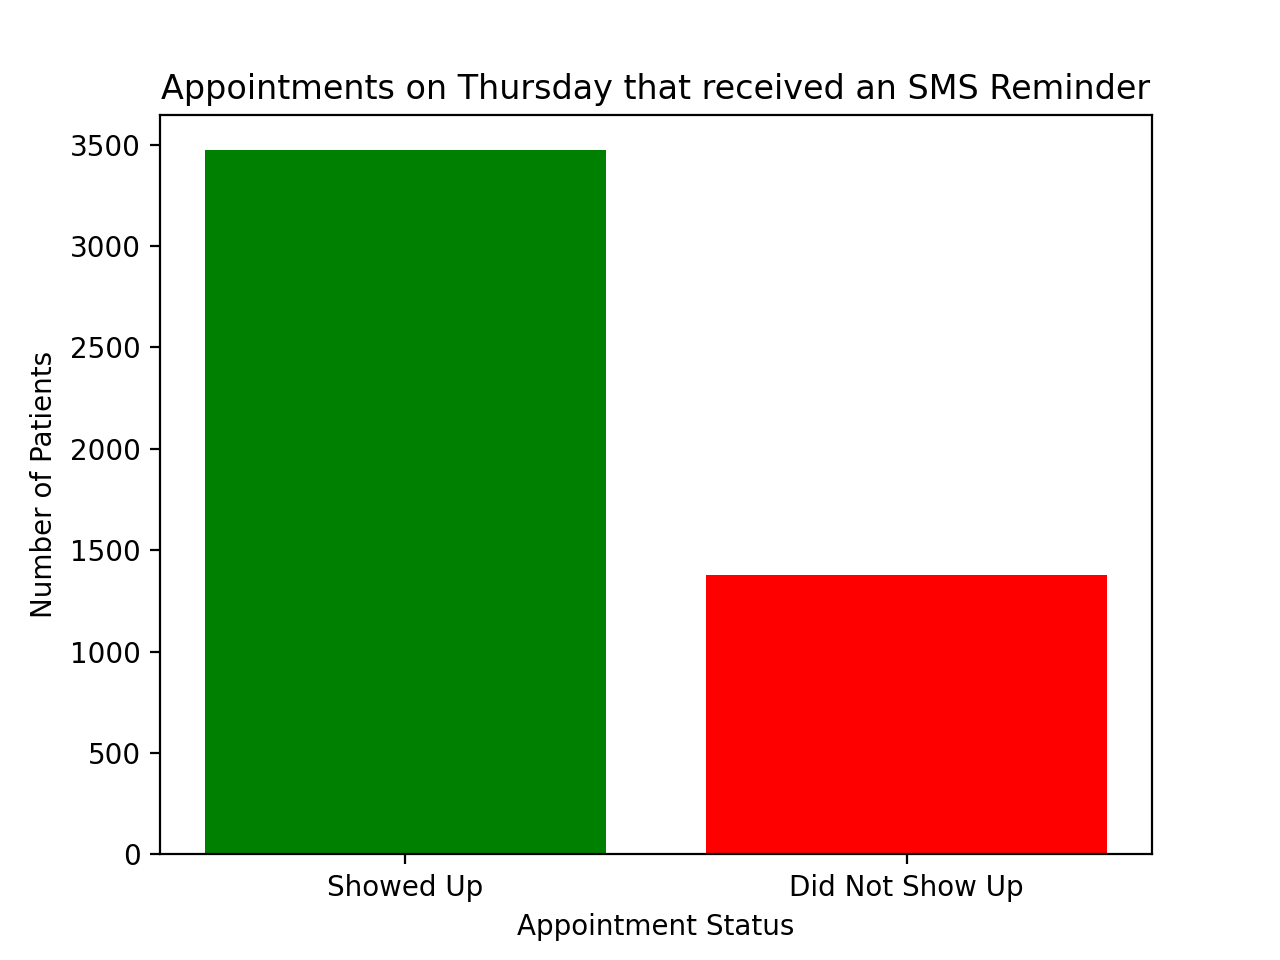

In [44]:
# Filter the DataFrame for appointments on Thursday and received SMS
thursday_sms_received = base_data[(base_data['app_weekday'] == 'Thursday')& (base_data['SMSReceived'] == 1) ]

# Count the number of people who showed up
num_show_up_with_sms_on_thursday = thursday_sms_received[thursday_sms_received['Showed'] == 1].shape[0]

# Count the number of people who did not show up
num_no_show_up_with_sms_on_thursday = thursday_sms_received[thursday_sms_received['Showed'] == 0].shape[0]

# Create labels and values for the bar plot
labels = ['Showed Up', 'Did Not Show Up']
values = [num_show_up_with_sms_on_thursday, num_no_show_up_with_sms_on_thursday]

# Plot the bar graph
plt.bar(labels, values, color=['green', 'red'])
plt.title('Appointments on Thursday that received an SMS Reminder')
plt.xlabel('Appointment Status')
plt.ylabel('Number of Patients')
plt.show()

In [45]:
num_show_up_with_sms_on_thursday /(num_show_up_with_sms_on_thursday+num_no_show_up_with_sms_on_thursday)


0.71611305962451

Thursday has the highest showed up rate. About 71% of the people who were scheduled for thursday that received an SMS reminder, showed up.

5. What is the proportions of sms received?

In [46]:
sms_prop = base_data.SMSReceived.value_counts()[0] / base_data.shape[0]
sms_prop

0.6789743682539108

In [47]:
no_sms_prop = base_data.SMSReceived.value_counts()[1] / base_data.shape[0]
no_sms_prop

0.32102563174608917

In [48]:
base_data.groupby('SMSReceived')['Showed'].mean()

SMSReceived
0    0.832967
1    0.724255
Name: Showed, dtype: float64

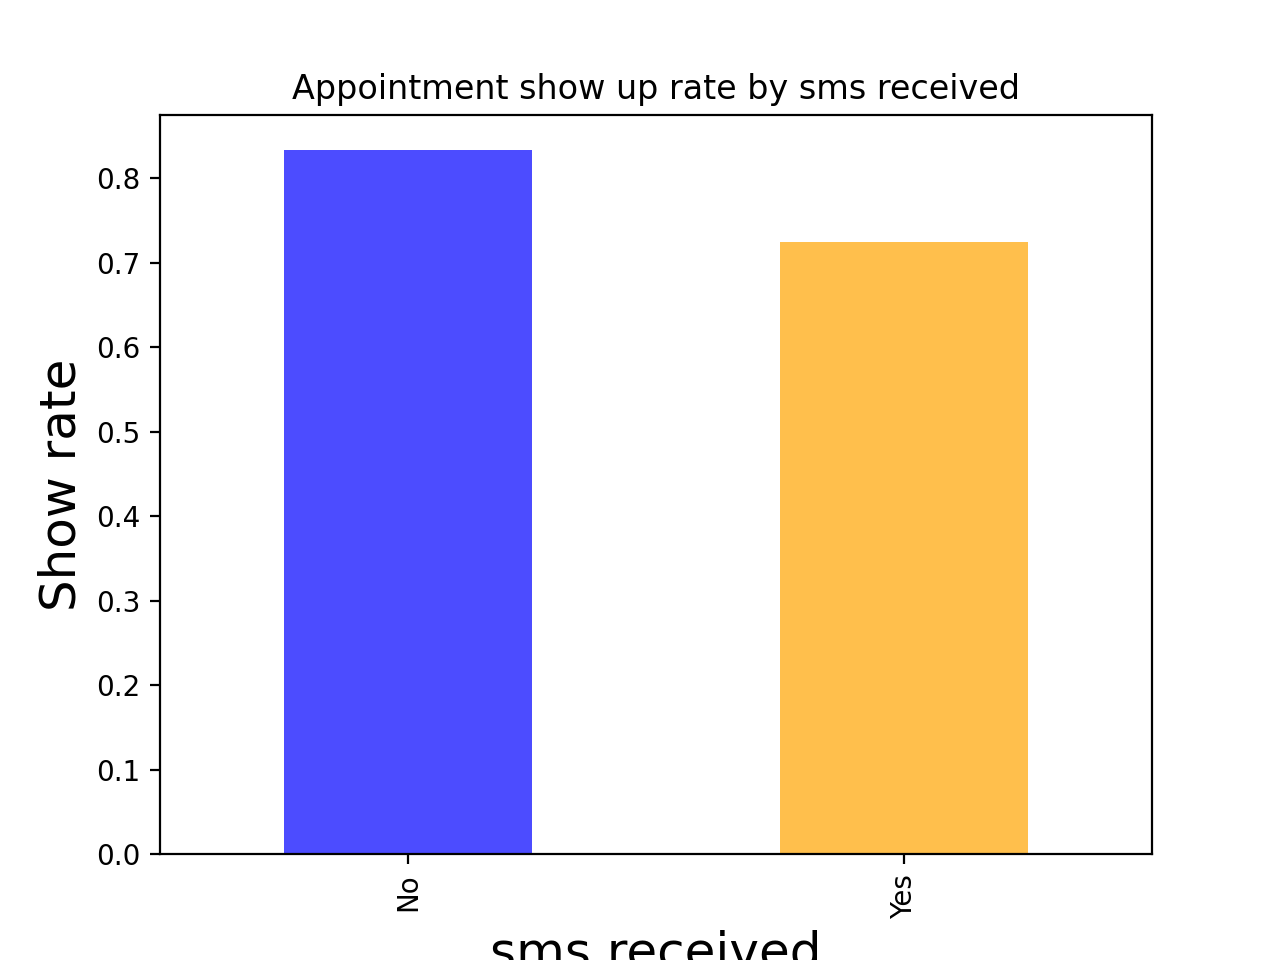

In [53]:
# show rate bar chart with sms received

base_data.groupby('SMSReceived')['Showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show up rate by sms received');
plt.xlabel('sms received', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

The showed up rate of patients with no SMS reminder is higher that those who received reminders.

6. What is the most common condition among people scheduled for appointment?







In [54]:
hyper_prop = base_data.Hypertension.mean()*100
diabetes_prop = base_data.Diabetes.mean()*100
alcoholism_prop = base_data.Alcoholism.mean()*100
handicap_prop = base_data.Handicap.mean()*100


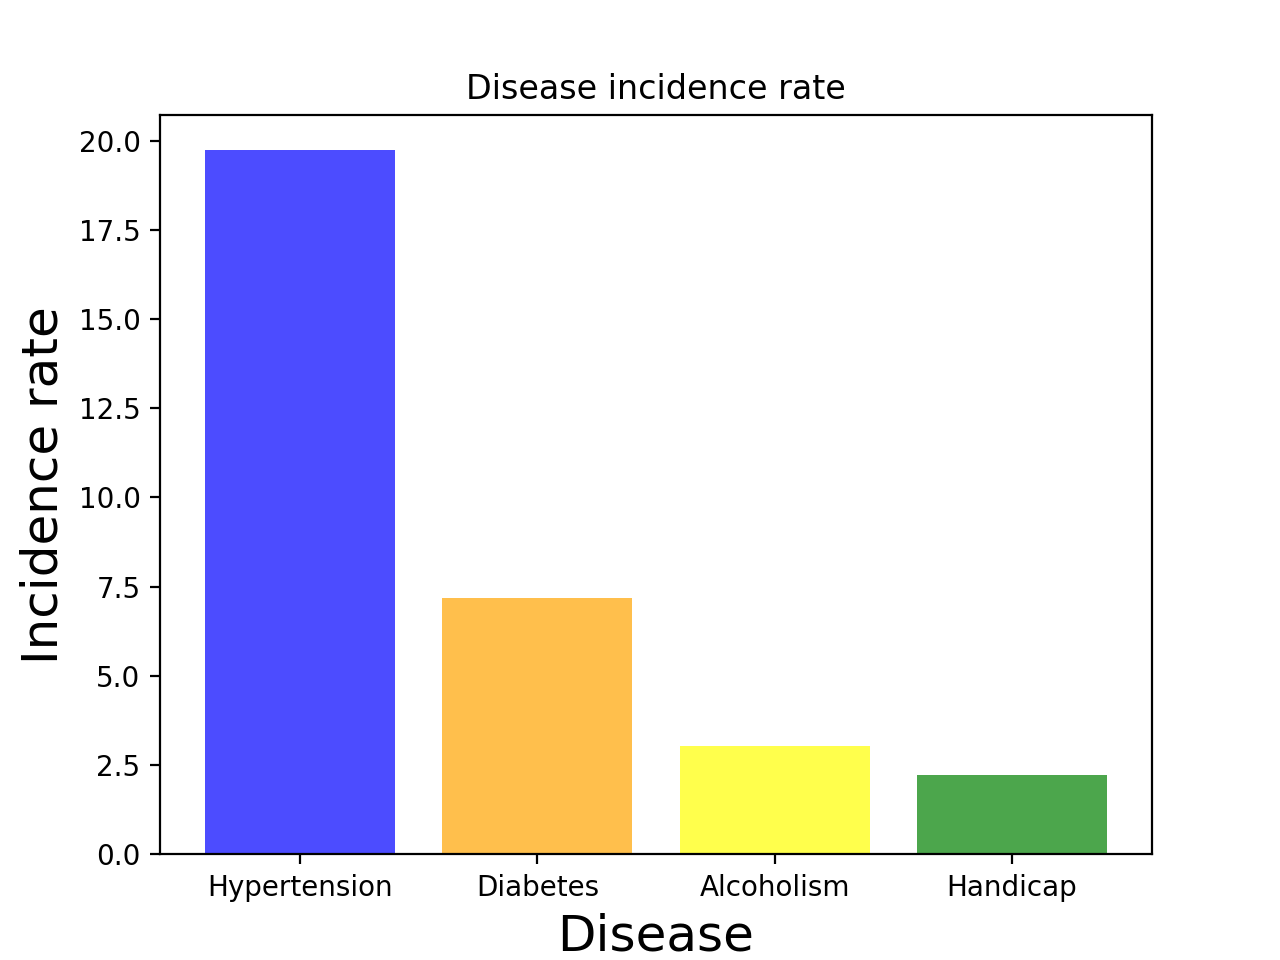

In [55]:
colors = ['blue', 'orange', 'yellow', 'green']
locations = [1, 2, 3, 4]
heights = [hyper_prop, diabetes_prop, alcoholism_prop, handicap_prop]
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Disease incidence rate')
plt.xlabel('Disease', fontsize=18)
plt.ylabel('Incidence rate', fontsize=18)
plt.xticks(locations, labels);

7. With hypertension having the highest incident rate, lets look at the what age group is mostly affect by it?

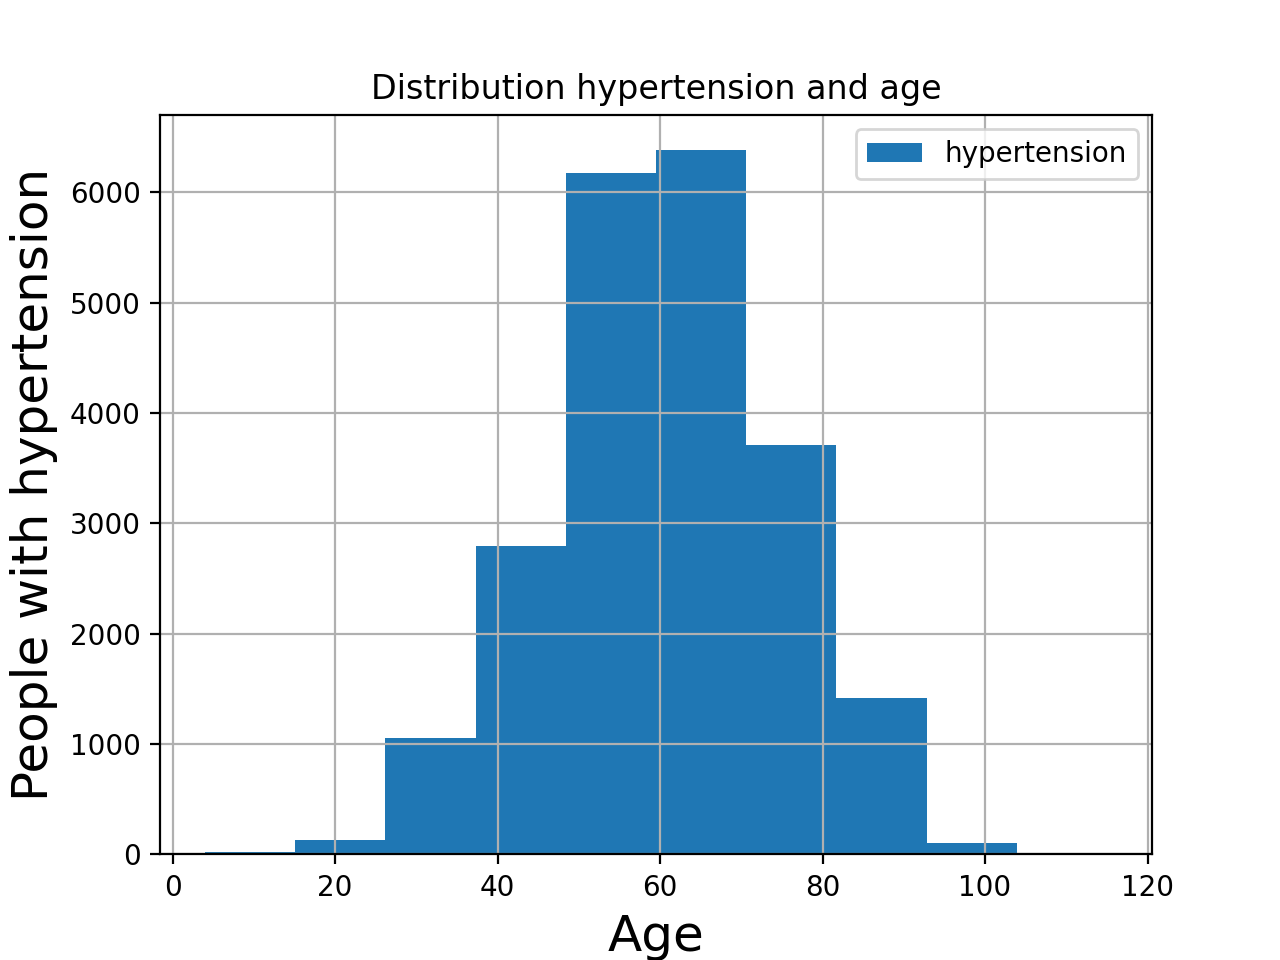

In [56]:
# create a plot chart for the hypertesnion and age
base_data.Age[base_data.Hypertension == 1].hist(bins = 10, label = 'hypertension' );
plt.title('Distribution hypertension and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with hypertension', fontsize=18);
plt.legend();

8. Does disease affect appointment show rate ?

In [37]:
base_data.groupby('Hypertension')['Showed'].mean()

Hypertension
0    0.790963
1    0.826980
Name: Showed, dtype: float64

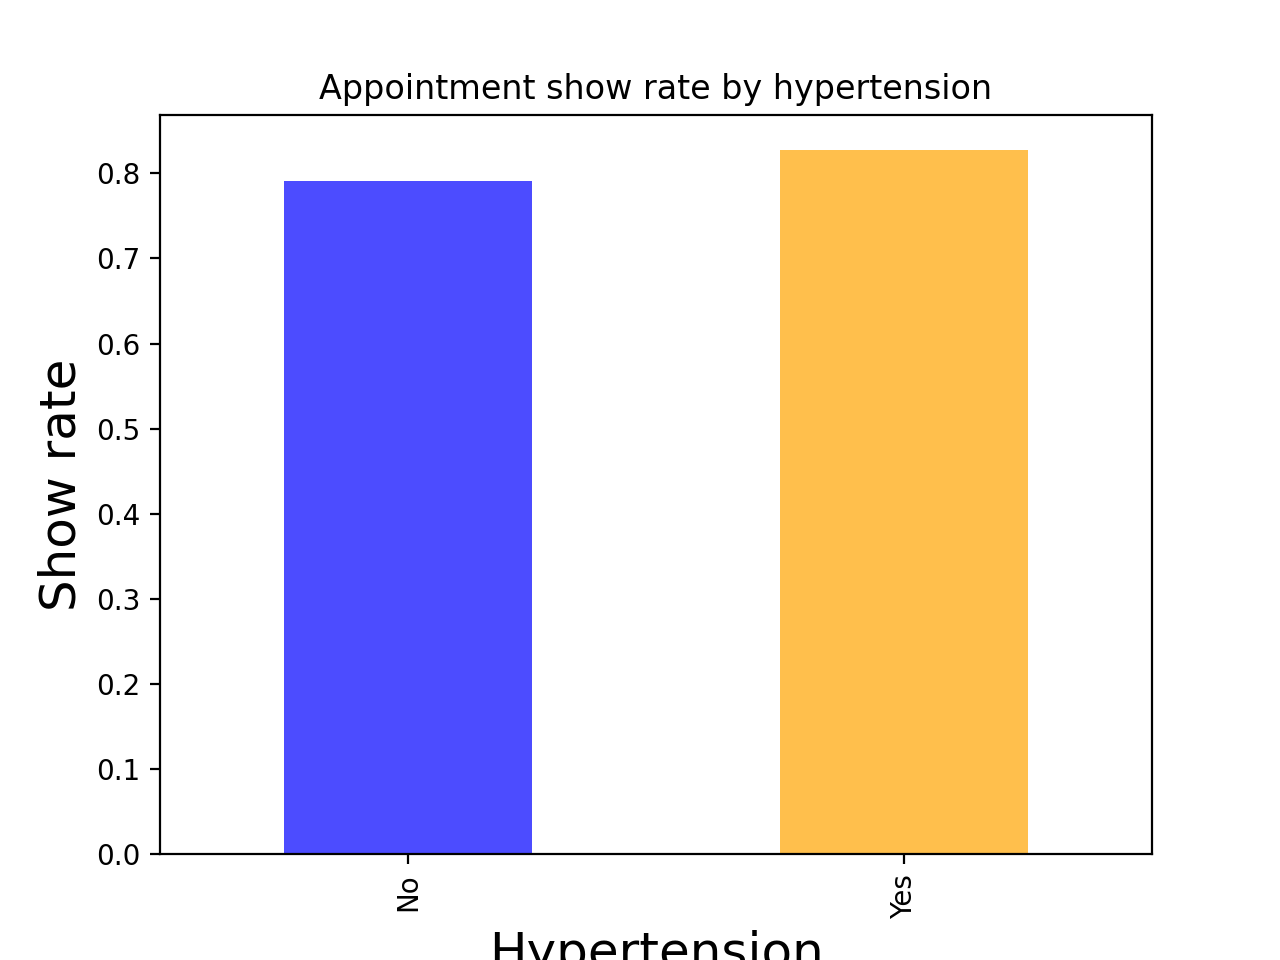

In [40]:
# show rate bar chart with hypertension

base_data.groupby('Hypertension')['Showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by hypertension');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Hypertension', fontsize=18);

In [41]:
base_data.groupby('Diabetes')['Showed'].mean()

Diabetes
0    0.796372
1    0.819967
Name: Showed, dtype: float64

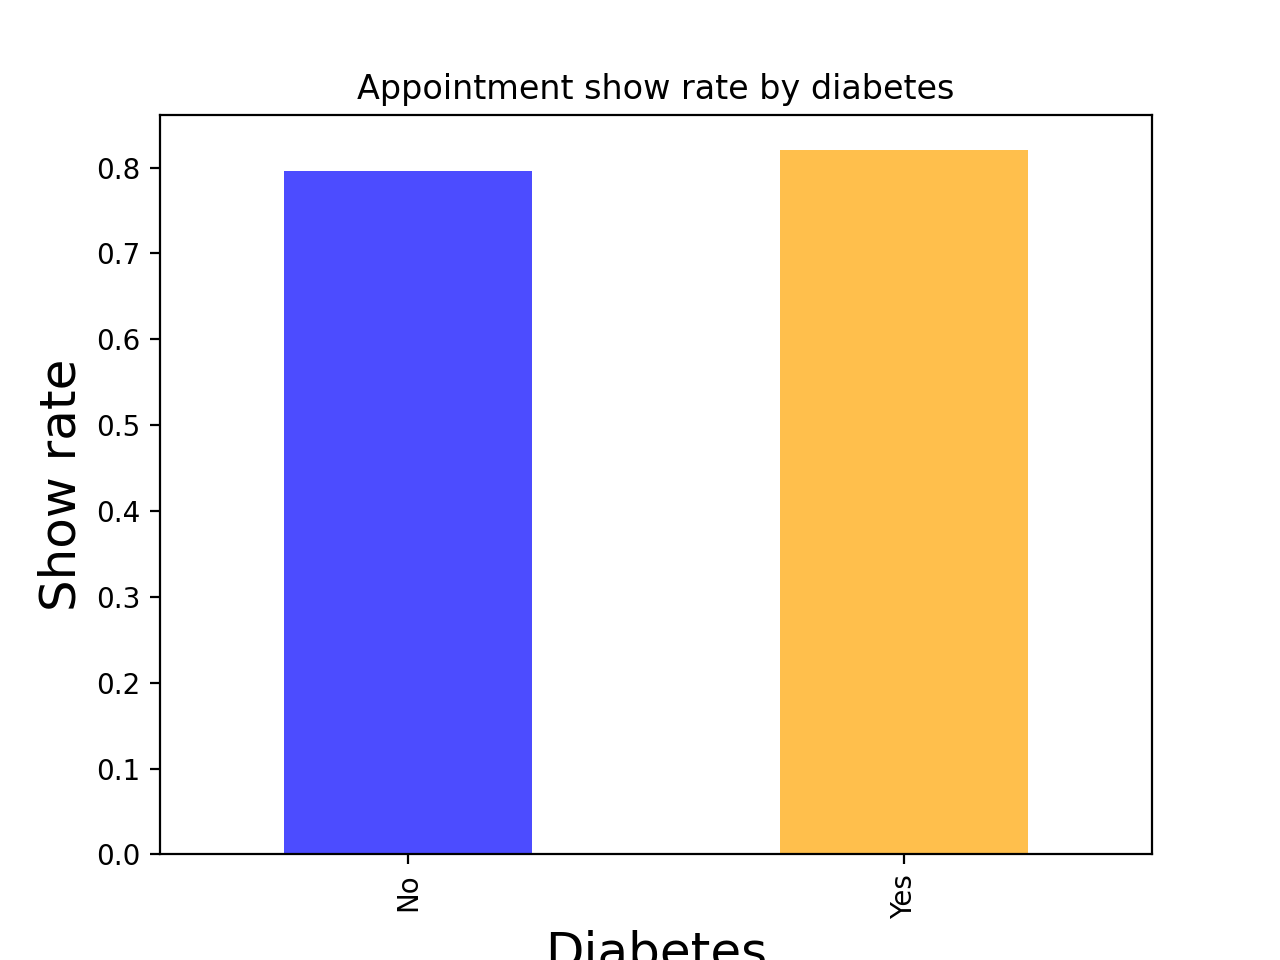

In [42]:
# show rate bar chart with diabetes

base_data.groupby('Diabetes')['Showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by diabetes');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Diabetes', fontsize=18);

In [43]:
base_data.groupby('Alcoholism')['Showed'].mean()

Alcoholism
0    0.798054
1    0.798512
Name: Showed, dtype: float64

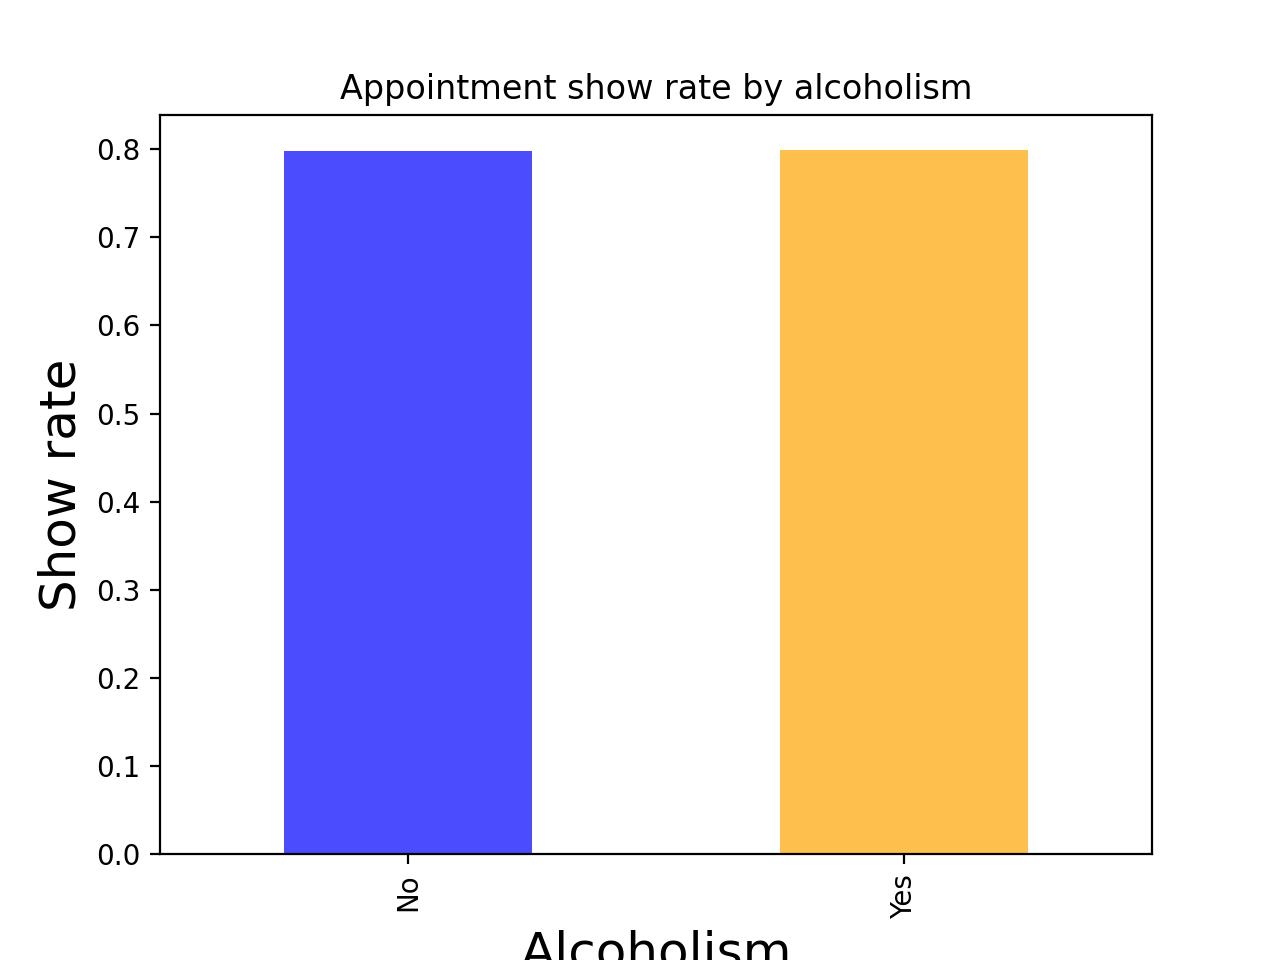

In [44]:
# show rate bar chart with alcoholism

base_data.groupby('Alcoholism')['Showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by alcoholism');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Alcoholism', fontsize=18);

All the Patients with and without conditions have similar show up rate thust we can conclude that diagnosed conditions may not affect the show up rate.

 9. Who do go to the doctor more often, males or females?

In [59]:
base_data.Gender.value_counts()


F    71840
M    38687
Name: Gender, dtype: int64

In [60]:
Female_prop = base_data.Gender.value_counts()[0] / base_data.shape[0]
Female_prop

0.6499769287142508

In [62]:
Male_prop = base_data.Gender.value_counts()[1] / base_data.shape[0]
Male_prop

0.35002307128574917

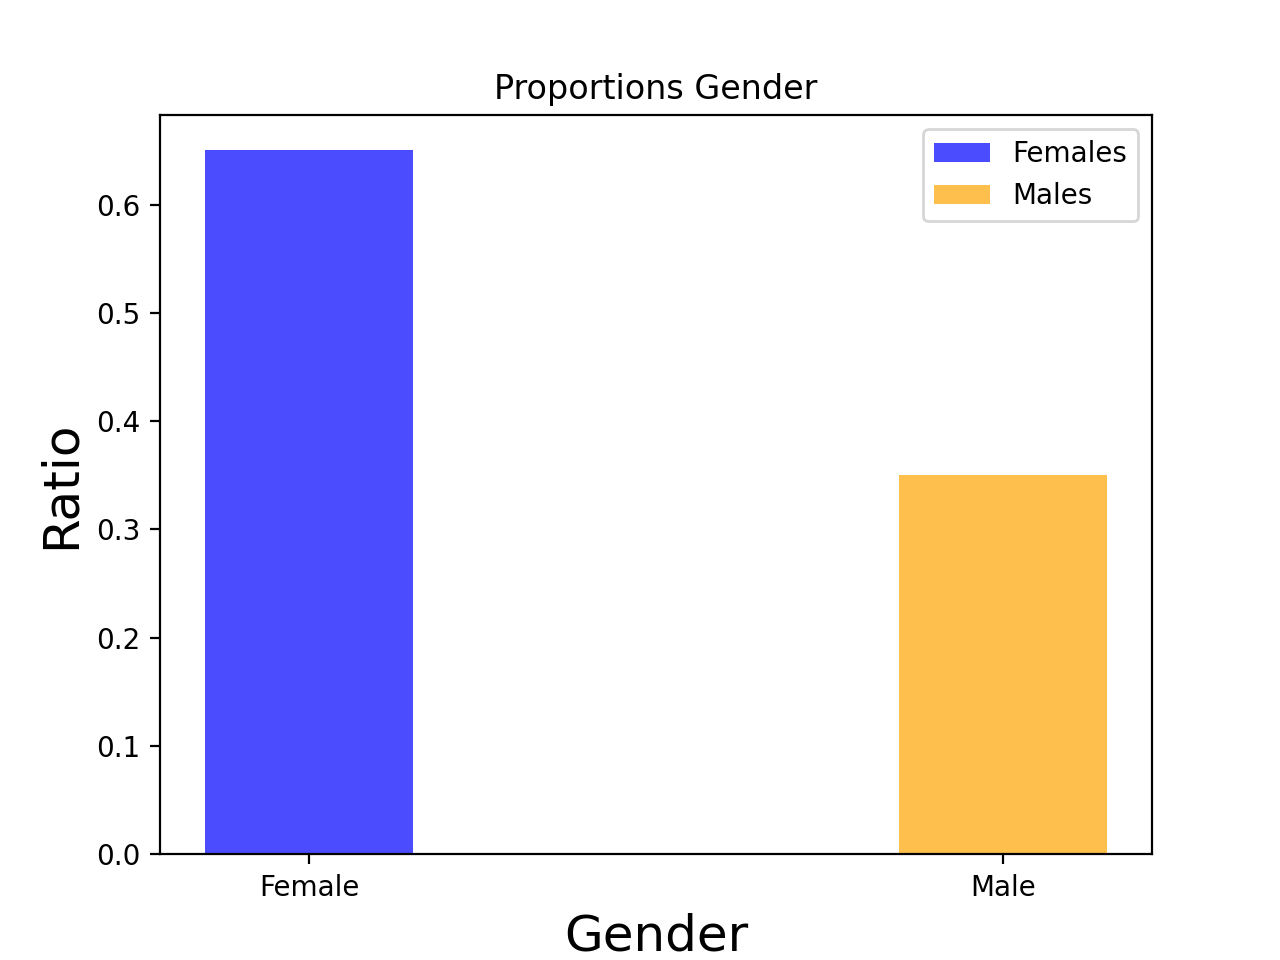

In [63]:
Female_bar = plt.bar(0, Female_prop, width=.3, alpha=0.7, color ='blue', label='Females' )
Male_bar = plt.bar(1, Male_prop, width=.3, alpha=0.7, color='orange', label='Males')

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions Gender');
plt.legend();

Female patients make up 65% of the appointments

10. What is the show up rate for Gender?

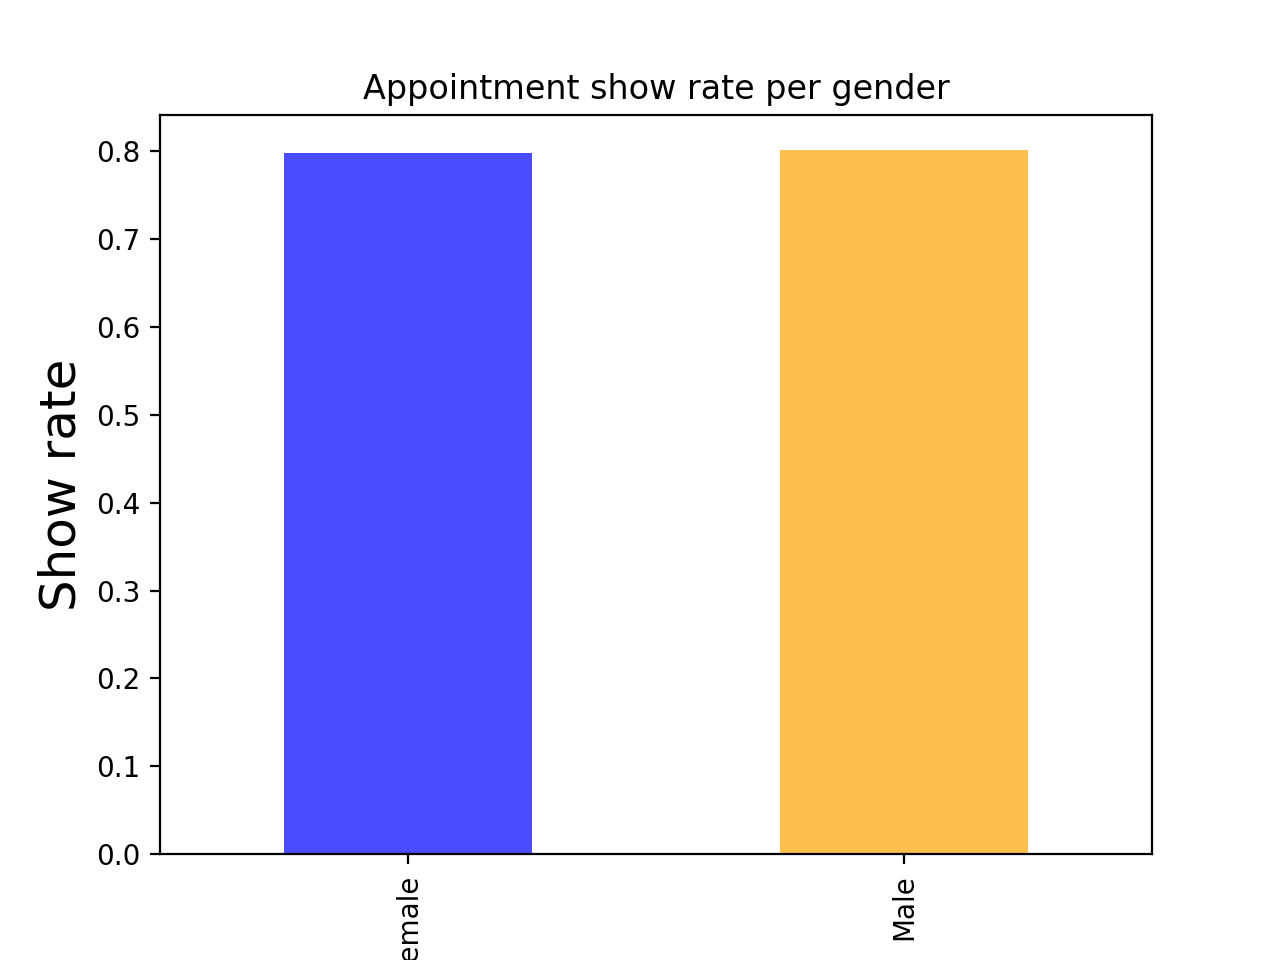

In [66]:
# show rate bar chart with one bar for Females (F) and one bar for Males (M).

base_data.groupby('Gender')['Showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Gender', fontsize=18)
plt.title('Appointment show rate per gender');

Showed up rate for both genders are about the same at about 80%

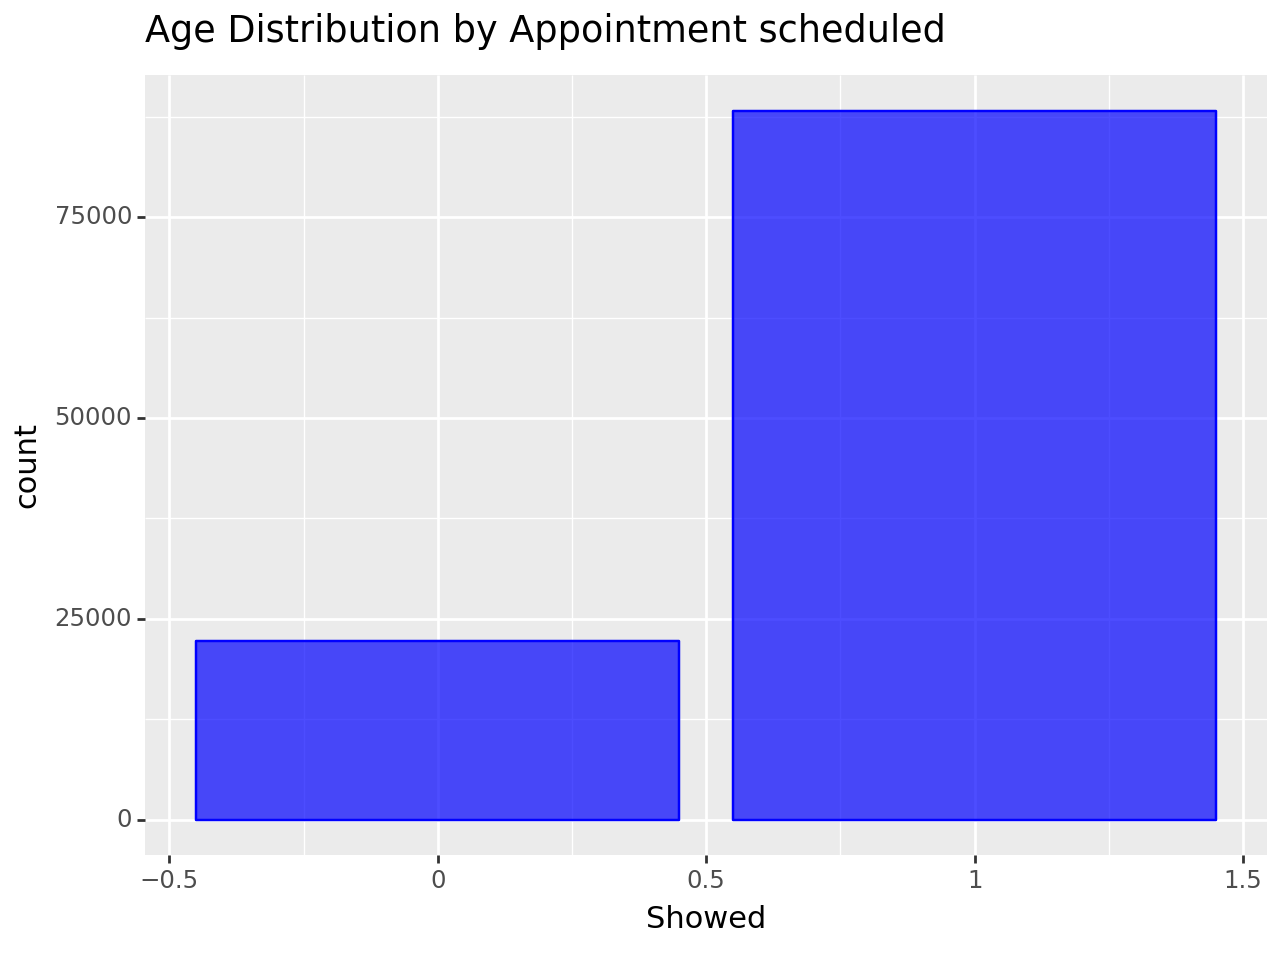

<Figure Size: (640 x 480)>

In [71]:
ggplot(base_data, aes(x='Showed')) +geom_bar( color='blue', fill='blue', alpha=0.7)+ggtitle("Age Distribution by Appointment scheduled")


## Analysis Findings:

**Age Distribution:** Patients aged 0 to 20 years have the highest number of scheduled appointments, while those aged 80 to 120 have the lowest.

**Insight:** Tailoring appointment reminders and communication strategies to different age groups can enhance appointment attendance.

**Cancellation Rates by Age:** Ages between 40 and 100 exhibit the lowest cancellation rates for appointments.

**Insight:** Implementing preventive measures or incentives for appointment adherence may be less critical for older age groups.

**Preferred Appointment Days:** Tuesday and Wednesday are the preferred days for appointments, based on appointment counts.

**Insight:** Healthcare facilities can allocate resources and staff availability accordingly to accommodate the highest demand days.

**Show-up Rates by Day:** Thursday shows the highest show-up rate, while Saturday has the lowest.

**Insight**: Adjusting appointment availability or scheduling fewer appointments on low attendance days can optimize resource utilization.

**Impact of Diagnosed Conditions:** Patients with and without diagnosed conditions exhibit similar show-up rates.

**Insight:** While diagnosed conditions are essential for patient care, they may not significantly impact appointment attendance.

**Gender Distribution**: Female patients constitute 65% of scheduled appointments.

**Insight:** Targeted outreach or communication strategies can be tailored to address potential barriers to attendance for specific gender groups.

**Consistent Show-up Rates:** Approximately 80% of patients usually show up to their scheduled appointments.

**Insight:** Despite various factors, maintaining consistent show-up rates highlights the overall reliability of patients.

**Recommendations:**
Based on these insights, healthcare facilities can consider the following recommendations to enhance appointment attendance:

Implement personalized communication channels, such as SMS reminders, tailored to patients' preferences and appointment characteristics.
Optimize appointment scheduling by allocating resources based on peak demand days and times.
Provide incentives or rewards for consistent attendance, especially for high-risk patient demographics.
Continuously monitor and evaluate attendance patterns to adapt strategies and interventions for maximum effectiveness.


**Conclusion:**
By leveraging data-driven insights, healthcare providers can implement targeted strategies to maximize appointment attendance, leading to better patient outcomes and resource utilization. By understanding patient preferences, behaviors, and needs, healthcare facilities can streamline operations and enhance overall patient experience.